# Question

Lab-2 : Multiple Linear Regression

Choose any dataset and find the following:

1. Train a Multiple Linear Regression Model using the statsmodels by apply feature selection.
2. Eliminating the features based on p-value and VIF(for checking Multicollinearity).

# Importing the required modules

In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the file

In [40]:
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-2_Multiple_Linear_Regression\CarPrice.csv")

In [41]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Seggregating the columns

In [42]:
categorial = []
for i in df.columns:
    if df.dtypes[i] == 'object':
        categorial.append(i)

In [43]:
categorial

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [44]:
numerical = list(set(df.columns).difference(categorial))
numerical

['carlength',
 'compressionratio',
 'stroke',
 'symboling',
 'curbweight',
 'citympg',
 'carwidth',
 'carheight',
 'car_ID',
 'boreratio',
 'enginesize',
 'highwaympg',
 'peakrpm',
 'horsepower',
 'wheelbase',
 'price']

# Encoding the Categorical Variables

All the categorical variables will be encoded as follows:
1. If it has less than or equal to 3 cateogries then every category will be a new column with 0 or 1 as the entry for "not present" and "present" respectively.
2. If it has more than 3 categories then the column will be encoded as a whole.

In [45]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
for i in categorial:
    categories = list(dict(df[i].value_counts()).keys())
    if len(categories) <= 3:
        oencoder = OneHotEncoder()
        results = oencoder.fit_transform(df[[i]])
        dff = pd.DataFrame(results.toarray(), columns=oencoder.categories_)
        df = df.join(dff)
        df.rename(columns="".join, inplace=True)
        df = df.drop(i,axis=1)
    else:
        df[i] = df[i].replace(categories,[i for i in range(len(categories))])
        

In [47]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'carbody', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel',
       'gas', 'std', 'turbo', 'four', 'two', '4wd', 'fwd', 'rwd', 'front',
       'rear'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginetype        205 non-null    int64  
 10  cylindernumber    205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  fuelsystem        205 non-null    int64  
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

# Test-Train Split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(df,
    df['price'],
    test_size = 0.1,
    train_size=0.90,
    random_state = 0
)

# Recursive Feature Elimination

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)   

rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

C:\Users\mitug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=16 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[('car_ID', False, 12),
 ('symboling', True, 1),
 ('CarName', False, 14),
 ('carbody', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', False, 15),
 ('enginetype', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 9),
 ('fuelsystem', False, 3),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 11),
 ('peakrpm', False, 17),
 ('citympg', True, 1),
 ('highwaympg', False, 4),
 ('price', True, 1),
 ('diesel', False, 7),
 ('gas', False, 6),
 ('std', True, 1),
 ('turbo', True, 1),
 ('four', True, 1),
 ('two', True, 1),
 ('4wd', False, 8),
 ('fwd', False, 5),
 ('rwd', False, 2),
 ('front', True, 1),
 ('rear', True, 1)]

# Training the Multiple Linear Regression Model

In [51]:
X_train = sm.add_constant(X_train)
X_train.pop('price')
X_test.pop("price")

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
Name: price, dtype: float64

## Trying with all features

•	We cannot just drop columns based on p-values since we also have to take the VIF into consideration for checking about Multi-collinearity. Here, we will keep the threshold of VIF as 5. Any column having VIF greater than threshold and a higher p-value will be dropped. Consequently, the changes in the R2 , adjusted R2 and mainly the F-statistic.
<br>
•	VIF approach will only be used for numerical columns.

In [52]:
lr_1 = sm.OLS(y_train, X_train).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.19
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.28e-70
Time:                        22:02:34   Log-Likelihood:                -1691.9
No. Observations:                 184   AIC:                             3438.
Df Residuals:                     157   BIC:                             3525.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.243e+04   5096.616     -2.440      0.016   -2.25e+04   -2368.104
car_ID             -15.6191      4.171     -3.745      0.000     -23.857      -7.381
symboling          550.6531    267.911      2.055      0.042      21.478    1079.828
CarName             -1.4940      5.372     -0.278      0.781     -12.105       9.117
carbody             10.9928    252.639      0.044      0.965    -488.017     510.002
wheelbase           97.0771    112.098      0.866      0.388    -124.337     318.491
carlength            6.0848     55.606      0.109      0.913    -103.747     115.917
carwidth           528.5458    265.088      1.994      0.048       4.948    1052.144
carheight          105.2383    136.950      0.768      0.443    -165.264     375.740
curbweight           3.2438      1.859      1.745      0.083      -0.429       6.916
enginetype        -955.5337    208.454     -4.584      0.000   -1367.269    -543.798
cylindernumber    1480.5592    382.837      3.867      0.000     724.383    2236.735
enginesize          79.9331     17.691      4.518      0.000      44.990     114.877
fuelsystem        -467.2617    214.405     -2.179      0.031    -890.752     -43.771
boreratio         -249.6611   1186.097     -0.210      0.834   -2592.427    2093.105
stroke           -2471.7686    803.625     -3.076      0.002   -4059.079    -884.458
compressionratio  -680.2730    464.597     -1.464      0.145   -1597.939     237.393
horsepower           3.9727     20.999      0.189      0.850     -37.503      45.449
peakrpm              1.9437      0.657      2.960      0.004       0.646       3.241
citympg             41.2256    175.812      0.234      0.815    -306.036     388.487
highwaympg          46.1498    157.843      0.292      0.770    -265.620     357.919
diesel           -1124.0389   4858.685     -0.231      0.817   -1.07e+04    8472.783
gas              -1.131e+04   3175.741     -3.562      0.000   -1.76e+04   -5038.157
std              -6653.6794   2650.711     -2.510      0.013   -1.19e+04   -1418.025
turbo            -5781.2051   2541.313     -2.275      0.024   -1.08e+04    -761.631
four             -5936.9894   2577.516     -2.303      0.023    -1.1e+04    -845.908
two              -6497.8952   2559.598     -2.539      0.012   -1.16e+04   -1442.206
4wd              -5284.9654   1671.829     -3.161      0.002   -8587.144   -1982.787
fwd              -4901.7783   1908.027     -2.569      0.011   -8670.493   -1133.064
rwd              -2248.1408   1843.754     -1.219      0.225   -5889.904    1393.622
front            -1.237e+04   2675.875     -4.623      0.000   -1.77e+04   -7086.046
rear               -63.4794   2847.497     -0.022      0.982   -5687.824    5560.865
==============================================================================
Omnibus:                     

## Examining the VIF for the numerical features

The VIF threshold will be used as follows:
1. Atfirst, we will use the threshold as 10.
2. Then, we will use the threshold as 5.
Finally, we will choose the best model out of the obtained ones.

### Taking threshold for VIF as 5

In [53]:
dfcpy = X_train.drop(set(categorial).intersection(df.columns).union(['fwd','turbo','gas','diesel','four','two','4wd','std','rwd','front','rear','car_ID']),axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5651.51
13,citympg,28.06
14,highwaympg,24.68
6,curbweight,16.00
3,carlength,9.71
2,wheelbase,9.57
11,horsepower,8.93
7,enginesize,6.89
4,carwidth,6.48
5,carheight,2.35


We will drop citympg and highwaympg columns and retrain the model

In [54]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     69.94
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.30e-72
Time:                        22:02:34   Log-Likelihood:                -1692.4
No. Observations:                 184   AIC:                             3435.
Df Residuals:                     159   BIC:                             3515.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.151e+04   4946.075     -2.328      0.021   -2.13e+04   -1745.643
car_ID             -15.7705      4.152     -3.798      0.000     -23.972      -7.569
symboling          506.4479    255.384      1.983      0.049       2.066    1010.829
CarName             -1.8052      5.334     -0.338      0.735     -12.339       8.729
carbody             -9.7529    248.220     -0.039      0.969    -499.986     480.480
wheelbase           91.4697    111.260      0.822      0.412    -128.268     311.207
carlength           -5.0337     54.190     -0.093      0.926    -112.058     101.991
carwidth           555.0832    262.588      2.114      0.036      36.473    1073.694
carheight          110.8892    135.971      0.816      0.416    -157.653     379.431
curbweight           2.7314      1.763      1.550      0.123      -0.750       6.212
enginetype        -948.6727    203.670     -4.658      0.000   -1350.921    -546.425
cylindernumber    1348.6253    357.682      3.770      0.000     642.204    2055.047
enginesize          83.6496     16.338      5.120      0.000      51.381     115.918
fuelsystem        -467.4813    211.815     -2.207      0.029    -885.815     -49.148
boreratio         -468.2755   1156.505     -0.405      0.686   -2752.368    1815.817
stroke           -2419.3233    798.703     -3.029      0.003   -3996.759    -841.888
compressionratio  -519.0064    428.841     -1.210      0.228   -1365.966     327.954
horsepower          -0.5474     19.933     -0.027      0.978     -39.915      38.820
peakrpm              1.8472      0.646      2.858      0.005       0.570       3.124
diesel           -1486.4138   4765.466     -0.312      0.756   -1.09e+04    7925.363
gas              -1.003e+04   2893.771     -3.465      0.001   -1.57e+04   -4312.522
std              -6201.2327   2559.966     -2.422      0.017   -1.13e+04   -1145.310
turbo            -5312.8899   2478.608     -2.143      0.034   -1.02e+04    -417.649
four             -5490.4968   2498.949     -2.197      0.029   -1.04e+04    -555.081
two              -6023.6258   2487.777     -2.421      0.017   -1.09e+04   -1110.276
4wd              -5027.1378   1645.553     -3.055      0.003   -8277.098   -1777.178
fwd              -4559.6674   1836.906     -2.482      0.014   -8187.551    -931.784
rwd              -1927.3174   1785.409     -1.079      0.282   -5453.493    1598.858
front            -1.191e+04   2619.013     -4.548      0.000   -1.71e+04   -6738.527
rear               396.9452   2756.433      0.144      0.886   -5047.000    5840.890
==============================================================================
Omnibus:                       48.498   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.638
Skew:                           0.892   P

In [55]:
dfcpy = dfcpy.drop(['citympg','highwaympg'],axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4926.25
6,curbweight,12.48
2,wheelbase,9.35
3,carlength,8.90
11,horsepower,7.73
4,carwidth,6.48
7,enginesize,6.11
5,carheight,2.34
8,boreratio,2.00
12,peakrpm,1.99


We will drop curbweight(VIF > 5) and retrain the model.

In [56]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     72.24
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.00e-72
Time:                        22:02:35   Log-Likelihood:                -1693.8
No. Observations:                 184   AIC:                             3436.
Df Residuals:                     160   BIC:                             3513.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.399e+04   4701.997     -2.975      0.003   -2.33e+04   -4701.334
car_ID             -15.7345      4.171     -3.773      0.000     -23.971      -7.498
symboling          511.1781    256.481      1.993      0.048       4.653    1017.704
CarName             -1.5850      5.355     -0.296      0.768     -12.161       8.991
carbody            119.0839    234.906      0.507      0.613    -344.832     582.999
wheelbase           96.2048    111.704      0.861      0.390    -124.399     316.809
carlength           30.5479     49.300      0.620      0.536     -66.815     127.910
carwidth           655.6774    255.551      2.566      0.011     150.990    1160.365
carheight          133.7252    135.761      0.985      0.326    -134.389     401.840
enginetype        -871.2596    198.312     -4.393      0.000   -1262.907    -479.612
cylindernumber    1302.1177    357.979      3.637      0.000     595.144    2009.091
enginesize          93.6847     15.066      6.218      0.000      63.931     123.439
fuelsystem        -405.2226    208.879     -1.940      0.054    -817.738       7.293
boreratio         -742.5985   1147.873     -0.647      0.519   -3009.534    1524.337
stroke           -2342.4446    800.645     -2.926      0.004   -3923.639    -761.250
compressionratio  -572.8490    429.300     -1.334      0.184   -1420.674     274.976
horsepower           7.1997     19.380      0.372      0.711     -31.074      45.474
peakrpm              1.8300      0.649      2.819      0.005       0.548       3.112
diesel           -2223.8176   4762.374     -0.467      0.641   -1.16e+04    7181.402
gas              -1.176e+04   2679.876     -4.390      0.000   -1.71e+04   -6471.006
std              -7501.9021   2429.044     -3.088      0.002   -1.23e+04   -2704.780
turbo            -6485.4133   2370.623     -2.736      0.007   -1.12e+04   -1803.667
four             -6646.4593   2395.452     -2.775      0.006   -1.14e+04   -1915.678
two              -7340.8561   2348.289     -3.126      0.002    -1.2e+04   -2703.217
4wd              -5499.2886   1624.170     -3.386      0.001   -8706.865   -2291.712
fwd              -5772.8111   1669.017     -3.459      0.001   -9068.956   -2476.666
rwd              -2715.2157   1718.971     -1.580      0.116   -6110.014     679.583
front             -1.28e+04   2567.289     -4.984      0.000   -1.79e+04   -7725.075
rear             -1192.0978   2569.802     -0.464      0.643   -6267.204    3883.009
==============================================================================
Omnibus:                       46.843   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.521
Skew:                           0.862   Prob(JB):                     3.18e-46
Kurtosis:                       7.935   Cond. N

In [57]:
dfcpy.columns

Index(['const', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm'],
      dtype='object')

In [58]:
dfcpy = dfcpy.drop(['curbweight'],axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4273.98
2,wheelbase,8.93
3,carlength,7.96
10,horsepower,6.36
4,carwidth,6.32
6,enginesize,5.75
5,carheight,2.34
7,boreratio,1.99
11,peakrpm,1.95
1,symboling,1.75


We will drop whellbase(VIF > 5) and retrain the model.

In [59]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     75.61
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           3.26e-73
Time:                        22:02:35   Log-Likelihood:                -1694.3
No. Observations:                 184   AIC:                             3435.
Df Residuals:                     161   BIC:                             3508.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.456e+04   4650.936     -3.131      0.002   -2.37e+04   -5375.726
car_ID             -15.8497      4.165     -3.805      0.000     -24.075      -7.624
symboling          424.1302    235.538      1.801      0.074     -41.012     889.272
CarName             -2.2039      5.302     -0.416      0.678     -12.675       8.267
carbody             86.7453    231.699      0.374      0.709    -370.816     544.307
carlength           48.1026     44.853      1.072      0.285     -40.473     136.679
carwidth           746.8814    232.390      3.214      0.002     287.955    1205.807
carheight          180.4187    124.366      1.451      0.149     -65.180     426.017
enginetype        -822.3518    189.856     -4.331      0.000   -1197.280    -447.424
cylindernumber    1309.1292    357.599      3.661      0.000     602.939    2015.319
enginesize          97.8431     14.260      6.861      0.000      69.683     126.004
fuelsystem        -423.8313    207.592     -2.042      0.043    -833.785     -13.877
boreratio         -772.0894   1146.441     -0.673      0.502   -3036.091    1491.912
stroke           -2248.0635    792.473     -2.837      0.005   -3813.046    -683.081
compressionratio  -604.8062    427.350     -1.415      0.159   -1448.740     239.128
horsepower           0.5450     17.759      0.031      0.976     -34.526      35.616
peakrpm              1.8925      0.645      2.936      0.004       0.620       3.165
diesel           -2387.9408   4754.742     -0.502      0.616   -1.18e+04    7001.762
gas              -1.217e+04   2635.349     -4.619      0.000   -1.74e+04   -6968.182
std              -7879.5685   2387.218     -3.301      0.001   -1.26e+04   -3165.272
turbo            -6680.8630   2357.842     -2.833      0.005   -1.13e+04   -2024.577
four             -6963.0012   2365.189     -2.944      0.004   -1.16e+04   -2292.207
two              -7597.4302   2327.447     -3.264      0.001   -1.22e+04   -3001.170
4wd              -5809.4284   1582.476     -3.671      0.000   -8934.515   -2684.342
fwd              -5984.5166   1649.492     -3.628      0.000   -9241.947   -2727.086
rwd              -2766.4864   1716.562     -1.612      0.109   -6156.366     623.393
front            -1.304e+04   2549.991     -5.112      0.000   -1.81e+04   -8000.115
rear             -1524.5725   2538.603     -0.601      0.549   -6537.826    3488.681
==============================================================================
Omnibus:                       44.255   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.977
Skew:                           0.816   Prob(JB):                     3.39e-42
Kurtosis:                       7.716   Cond. No.                     7.81e+16
=====================================================

In [60]:
dfcpy = dfcpy.drop(['wheelbase'],axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3893.61
2,carlength,6.20
9,horsepower,5.89
5,enginesize,5.64
3,carwidth,4.87
4,carheight,2.16
6,boreratio,1.99
10,peakrpm,1.95
1,symboling,1.48
8,compressionratio,1.46


We will drop carlength(VIF > 5) and retrain the model.

In [61]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     79.09
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           6.37e-74
Time:                        22:02:35   Log-Likelihood:                -1694.9
No. Observations:                 184   AIC:                             3434.
Df Residuals:                     162   BIC:                             3505.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.598e+04   4459.513     -3.584      0.000   -2.48e+04   -7177.885
car_ID             -15.4960      4.154     -3.730      0.000     -23.699      -7.293
symboling          450.2791    234.381      1.921      0.056     -12.557     913.115
CarName             -2.1027      5.304     -0.396      0.692     -12.577       8.371
carbody             69.3801    231.240      0.300      0.765    -387.253     526.013
carwidth           881.3194    195.772      4.502      0.000     494.726    1267.913
carheight          238.7537    111.891      2.134      0.034      17.800     459.707
enginetype        -798.7908    188.668     -4.234      0.000   -1171.355    -426.226
cylindernumber    1268.1396    355.716      3.565      0.000     565.702    1970.577
enginesize          98.2125     14.262      6.886      0.000      70.048     126.377
fuelsystem        -429.4343    207.622     -2.068      0.040    -839.429     -19.439
boreratio         -612.4317   1137.261     -0.539      0.591   -2858.199    1633.336
stroke           -2206.3703    791.886     -2.786      0.006   -3770.120    -642.621
compressionratio  -617.8786    427.374     -1.446      0.150   -1461.821     226.064
horsepower           4.8003     17.318      0.277      0.782     -29.398      38.999
peakrpm              1.8622      0.644      2.890      0.004       0.590       3.134
diesel           -2970.1358   4725.839     -0.628      0.531   -1.23e+04    6362.052
gas              -1.301e+04   2516.985     -5.170      0.000    -1.8e+04   -8043.690
std              -8516.6701   2313.191     -3.682      0.000   -1.31e+04   -3948.775
turbo            -7467.4851   2241.892     -3.331      0.001   -1.19e+04   -3040.385
four             -7568.5164   2297.874     -3.294      0.001   -1.21e+04   -3030.868
two              -8415.6388   2199.869     -3.826      0.000   -1.28e+04   -4071.524
4wd              -6376.0710   1492.356     -4.272      0.000   -9323.050   -3429.092
fwd              -6474.8451   1585.597     -4.084      0.000   -9605.948   -3343.742
rwd              -3133.2391   1682.932     -1.862      0.064   -6456.551     190.073
front             -1.35e+04   2513.696     -5.372      0.000   -1.85e+04   -8539.052
rear             -2481.2686   2377.806     -1.044      0.298   -7176.760    2214.222
==============================================================================
Omnibus:                       48.920   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.409
Skew:                           0.895   Prob(JB):                     4.16e-50
Kurtosis:                       8.144   Cond. No.                     8.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [62]:
dfcpy = dfcpy.drop(['carlength'],axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3096.55
8,horsepower,5.79
4,enginesize,5.61
2,carwidth,3.01
9,peakrpm,1.95
5,boreratio,1.89
3,carheight,1.67
1,symboling,1.46
7,compressionratio,1.46
6,stroke,1.17


We will drop horsepower(VIF > 5) and retrain the model.

In [63]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     83.51
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.14e-75
Time:                        22:02:36   Log-Likelihood:                -1694.9
No. Observations:                 184   AIC:                             3432.
Df Residuals:                     163   BIC:                             3499.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.604e+04   4443.013     -3.609      0.000   -2.48e+04   -7262.319
car_ID             -15.4130      4.131     -3.731      0.000     -23.571      -7.255
symboling          458.4961    231.839      1.978      0.050       0.700     916.292
CarName             -2.2258      5.270     -0.422      0.673     -12.633       8.181
carbody             62.0478    229.070      0.271      0.787    -390.280     514.376
carwidth           879.5436    195.112      4.508      0.000     494.270    1264.817
carheight          237.3982    111.468      2.130      0.035      17.292     457.505
enginetype        -794.6047    187.529     -4.237      0.000   -1164.904    -424.306
cylindernumber    1291.2578    344.819      3.745      0.000     610.369    1972.146
enginesize         101.1405      9.556     10.584      0.000      82.272     120.009
fuelsystem        -444.2167    200.087     -2.220      0.028    -839.313     -49.120
boreratio         -567.9680   1122.698     -0.506      0.614   -2784.876    1648.940
stroke           -2201.8342    789.472     -2.789      0.006   -3760.744    -642.924
compressionratio  -619.4999    426.122     -1.454      0.148   -1460.931     221.931
peakrpm              1.9464      0.567      3.435      0.001       0.828       3.065
diesel           -3050.9941   4703.451     -0.649      0.517   -1.23e+04    6236.556
gas              -1.298e+04   2507.616     -5.178      0.000   -1.79e+04   -8033.009
std              -8619.9894   2276.488     -3.787      0.000   -1.31e+04   -4124.780
turbo            -7415.6131   2227.733     -3.329      0.001   -1.18e+04   -3016.677
four             -7595.7922   2289.256     -3.318      0.001   -1.21e+04   -3075.372
two              -8439.8102   2191.906     -3.850      0.000   -1.28e+04   -4111.619
4wd              -6402.5389   1485.075     -4.311      0.000   -9335.004   -3470.074
fwd              -6502.2229   1578.030     -4.120      0.000   -9618.239   -3386.206
rwd              -3130.8407   1678.137     -1.866      0.064   -6444.531     182.850
front            -1.362e+04   2472.120     -5.509      0.000   -1.85e+04   -8736.495
rear             -2417.5985   2359.974     -1.024      0.307   -7077.661    2242.464
==============================================================================
Omnibus:                       50.459   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.373
Skew:                           0.924   Prob(JB):                     1.73e-52
Kurtosis:                       8.261   Cond. No.                     8.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.49e-25. Thi

In [64]:
dfcpy = dfcpy.drop(['horsepower'],axis=1)
vif = pd.DataFrame()
vif['Features'] = dfcpy.columns
vif['VIF'] = [variance_inflation_factor(dfcpy.values, i) for i in range(dfcpy.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2745.72
2,carwidth,2.87
4,enginesize,2.75
5,boreratio,1.72
3,carheight,1.65
8,peakrpm,1.44
1,symboling,1.43
7,compressionratio,1.40
6,stroke,1.16


## Removing the features based on p-value.

We will drop the columns one by one with higher p-values and re-train the models

In [27]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower','carbody'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     88.40
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.75e-76
Time:                        21:57:48   Log-Likelihood:                -1695.0
No. Observations:                 184   AIC:                             3430.
Df Residuals:                     164   BIC:                             3494.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.596e+04   4421.951     -3.610      0.000   -2.47e+04   -7229.829
car_ID             -15.2971      4.098     -3.733      0.000     -23.388      -7.206
symboling          467.6570    228.710      2.045      0.042      16.060     919.254
CarName             -1.9803      5.177     -0.383      0.703     -12.203       8.242
carwidth           875.3803    193.956      4.513      0.000     492.408    1258.352
carheight          241.7667    109.983      2.198      0.029      24.602     458.931
enginetype        -792.8107    186.882     -4.242      0.000   -1161.815    -423.807
cylindernumber    1290.4837    343.832      3.753      0.000     611.576    1969.392
enginesize         101.1137      9.528     10.612      0.000      82.300     119.927
fuelsystem        -441.6668    199.300     -2.216      0.028    -835.191     -48.142
boreratio         -545.2988   1116.407     -0.488      0.626   -2749.684    1659.086
stroke           -2207.5236    786.960     -2.805      0.006   -3761.402    -653.645
compressionratio  -624.8867    424.454     -1.472      0.143   -1462.985     213.212
peakrpm              1.9244      0.559      3.442      0.001       0.820       3.029
diesel           -2989.8529   4684.740     -0.638      0.524   -1.22e+04    6260.328
gas              -1.297e+04   2500.039     -5.188      0.000   -1.79e+04   -8034.857
std              -8577.2576   2264.590     -3.788      0.000    -1.3e+04   -4105.746
turbo            -7383.8669   2218.354     -3.329      0.001   -1.18e+04   -3003.651
four             -7577.3152   2281.765     -3.321      0.001   -1.21e+04   -3071.890
two              -8383.8094   2175.960     -3.853      0.000   -1.27e+04   -4087.300
4wd              -6373.7742   1477.082     -4.315      0.000   -9290.324   -3457.224
fwd              -6488.2087   1572.719     -4.125      0.000   -9593.598   -3382.820
rwd              -3099.1416   1669.315     -1.857      0.065   -6395.263     196.979
front            -1.364e+04   2463.428     -5.538      0.000   -1.85e+04   -8778.731
rear             -2318.2696   2324.714     -0.997      0.320   -6908.497    2271.958
==============================================================================
Omnibus:                       49.533   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.812
Skew:                           0.913   Prob(JB):                     3.40e-50
Kurtosis:                       8.136   Cond. No.                     1.53e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-31. This might indicate that there are
strong multicollinearity problems or that the design 

In [28]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower','carbody','CarName'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.79
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           8.47e-77
Time:                        21:57:49   Log-Likelihood:                -1695.1
No. Observations:                 184   AIC:                             3428.
Df Residuals:                     165   BIC:                             3489.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.607e+04   4400.879     -3.652      0.000   -2.48e+04   -7383.475
car_ID             -14.7589      3.838     -3.845      0.000     -22.338      -7.180
symboling          474.4492    227.429      2.086      0.039      25.402     923.496
carwidth           888.0864    190.595      4.660      0.000     511.767    1264.406
carheight          237.7282    109.191      2.177      0.031      22.136     453.320
enginetype        -788.9978    186.132     -4.239      0.000   -1156.506    -421.490
cylindernumber    1261.3745    334.436      3.772      0.000     601.049    1921.700
enginesize         100.4533      9.346     10.748      0.000      82.000     118.907
fuelsystem        -421.7325    191.867     -2.198      0.029    -800.564     -42.901
boreratio         -534.8977   1113.185     -0.481      0.632   -2732.821    1663.026
stroke           -2231.2687    782.475     -2.852      0.005   -3776.223    -686.314
compressionratio  -639.3934    421.661     -1.516      0.131   -1471.940     193.153
peakrpm              1.9113      0.557      3.434      0.001       0.812       3.010
diesel           -2976.3667   4672.473     -0.637      0.525   -1.22e+04    6249.177
gas               -1.31e+04   2472.123     -5.298      0.000    -1.8e+04   -8215.331
std              -8611.1144   2256.998     -3.815      0.000   -1.31e+04   -4154.794
turbo            -7461.6564   2203.290     -3.387      0.001   -1.18e+04   -3111.379
four             -7620.8749   2273.019     -3.353      0.001   -1.21e+04   -3132.923
two              -8451.8959   2163.050     -3.907      0.000   -1.27e+04   -4181.071
4wd              -6403.6156   1471.200     -4.353      0.000   -9308.420   -3498.812
fwd              -6541.0402   1562.585     -4.186      0.000   -9626.279   -3455.802
rwd              -3128.1150   1663.276     -1.881      0.062   -6412.164     155.934
front            -1.374e+04   2443.141     -5.625      0.000   -1.86e+04   -8919.112
rear             -2329.8085   2318.497     -1.005      0.316   -6907.554    2247.937
==============================================================================
Omnibus:                       49.789   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.016
Skew:                           0.924   Prob(JB):                     8.34e-50
Kurtosis:                       8.106   Cond. No.                     1.62e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower','carbody','CarName','boreratio'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     99.76
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           9.35e-78
Time:                        21:57:49   Log-Likelihood:                -1695.2
No. Observations:                 184   AIC:                             3426.
Df Residuals:                     166   BIC:                             3484.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.641e+04   4333.815     -3.787      0.000    -2.5e+04   -7855.484
car_ID             -15.1649      3.736     -4.060      0.000     -22.540      -7.789
symboling          468.5389    226.570      2.068      0.040      21.209     915.869
carwidth           868.8604    185.916      4.673      0.000     501.797    1235.924
carheight          238.9772    108.907      2.194      0.030      23.956     453.998
enginetype        -794.2547    185.379     -4.284      0.000   -1160.260    -428.249
cylindernumber    1303.9016    321.764      4.052      0.000     668.623    1939.180
enginesize          99.3197      9.022     11.008      0.000      81.506     117.133
fuelsystem        -433.1989    189.936     -2.281      0.024    -808.201     -58.197
stroke           -2172.2690    770.989     -2.818      0.005   -3694.477    -650.061
compressionratio  -619.3312    418.616     -1.479      0.141   -1445.828     207.166
peakrpm              1.9453      0.551      3.531      0.001       0.858       3.033
diesel           -3242.0766   4628.876     -0.700      0.485   -1.24e+04    5896.980
gas              -1.317e+04   2461.663     -5.350      0.000    -1.8e+04   -8309.704
std              -8775.4484   2225.763     -3.943      0.000   -1.32e+04   -4380.997
turbo            -7636.5361   2167.984     -3.522      0.001   -1.19e+04   -3356.160
four             -7804.1972   2235.575     -3.491      0.001   -1.22e+04   -3390.372
two              -8607.7873   2133.622     -4.034      0.000   -1.28e+04   -4395.255
4wd              -6536.0835   1441.788     -4.533      0.000   -9382.689   -3689.478
fwd              -6597.6048   1554.530     -4.244      0.000   -9666.804   -3528.406
rwd              -3278.2961   1629.859     -2.011      0.046   -6496.220     -60.372
front            -1.384e+04   2429.136     -5.697      0.000   -1.86e+04   -9044.004
rear             -2571.9972   2257.800     -1.139      0.256   -7029.702    1885.707
==============================================================================
Omnibus:                       48.384   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.219
Skew:                           0.896   Prob(JB):                     6.78e-48
Kurtosis:                       8.012   Cond. No.                     1.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
lr_1 = sm.OLS(y_train, X_train.drop(['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower','carbody','boreratio','compressionratio','CarName'],axis=1)).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.63e-78
Time:                        21:57:49   Log-Likelihood:                -1696.4
No. Observations:                 184   AIC:                             3427.
Df Residuals:                     167   BIC:                             3481.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.017e+04   3525.859     -5.719      0.000   -2.71e+04   -1.32e+04
car_ID           -16.5440      3.630     -4.557      0.000     -23.711      -9.377
symboling        464.7502    227.360      2.044      0.043      15.879     913.621
carwidth         895.8347    185.677      4.825      0.000     529.258    1262.411
carheight        257.6406    108.558      2.373      0.019      43.317     471.964
enginetype      -736.3278    181.841     -4.049      0.000   -1095.332    -377.324
cylindernumber  1174.8092    310.808      3.780      0.000     561.190    1788.429
enginesize       100.7613      9.002     11.194      0.000      82.990     118.533
fuelsystem      -391.5979    188.511     -2.077      0.039    -763.769     -19.427
stroke         -1844.6377    741.125     -2.489      0.014   -3307.819    -381.456
peakrpm            1.7651      0.539      3.274      0.001       0.701       2.829
diesel         -9522.6629   1851.882     -5.142      0.000   -1.32e+04   -5866.546
gas            -1.064e+04   1779.212     -5.982      0.000   -1.42e+04   -7130.620
std            -1.095e+04   1678.437     -6.523      0.000   -1.43e+04   -7634.514
turbo          -9217.7264   1892.948     -4.870      0.000    -1.3e+04   -5480.534
four           -9685.0681   1845.438     -5.248      0.000   -1.33e+04   -6041.674
two            -1.048e+04   1723.508     -6.081      0.000   -1.39e+04   -7078.189
4wd            -7556.0434   1270.782     -5.946      0.000   -1.01e+04   -5047.176
fwd            -7968.7371   1252.498     -6.362      0.000   -1.04e+04   -5495.966
rwd            -4641.1492   1349.351     -3.440      0.001   -7305.134   -1977.165
front          -1.572e+04   2076.564     -7.571      0.000   -1.98e+04   -1.16e+04
rear           -4443.4222   1876.838     -2.368      0.019   -8148.810    -738.035
==============================================================================
Omnibus:                       49.177   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.343
Skew:                           0.838   Prob(JB):                     1.98e-59
Kurtosis:                       8.697   Cond. No.                     1.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Hence, the final model is obtained .

In [31]:
columns_dropped = ['citympg','highwaympg','curbweight','wheelbase','carlength','horsepower','carbody','boreratio','compressionratio','CarName']
X_train = X_train.drop(columns_dropped,axis=1)

# Validating the model

In [33]:
X_test = sm.add_constant(X_test.drop(columns_dropped,axis=1),has_constant="add")

In [34]:
y_pred_train = lr_1.predict(X_train)
y_pred_test = lr_1.predict(X_test)

In [35]:
r2_score(y_true = y_train, y_pred = y_pred_train)

0.9096658265134268

In [37]:
r2_score(y_true = y_test, y_pred = y_pred_test)

0.8524333248165189

C:\Users\mitug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


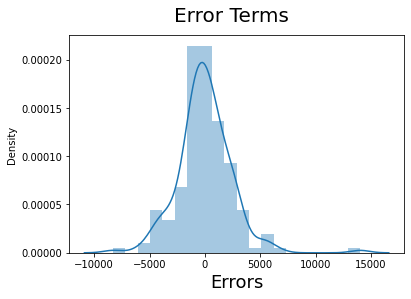

In [38]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()